<a href="https://colab.research.google.com/github/chathasphere/chathasphere.github.io/blob/main/306_materials/003_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Intro to R and ggplot
### January 11th, 2022



# 1. Logistics
My name is Prayag (pronounced "Pre-YAAG"; he/him/his pronouns), and I'll be your GSI this semester!

To download lab materials & get office hour info, go to my instructor webpage:
https://chathasphere.github.io/teaching/stats306/

The goal of these labs is to review concepts from lecture through examples and to give you practice writing code. 

Please fill out this brief Google form:
https://forms.gle/xYAxg1zkmjecgaZk8

Cheatsheet for Jupyter notebooks: https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.**pdf**

# 2. Introduction to R

In [2]:
library(tidyverse) # syntax for importing a package
# we'll be using tidyverse extensively this semester!

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 2.1 Assignment and operations


In [ ]:
x <- "hello world" # preferred syntax
x = "hello world" # this also works
print(x) # this function takes an argument

In [7]:
y <- 3.5 
z <- 5.5

res <- 3*y^2/(z+1) # basic PEMDAS operators
print(res)

[1] 5.653846


In [6]:
# modular arithmetic

8 %% 4 # remainder operator
10 %% 4
14 %/% 4 # quotient operator
14 %/% 7

[1] 0

[1] 2

[1] 3

[1] 2

## 2.2 Functions

In [8]:
?sqrt     # Look up documentation

In [ ]:
sqrt(5)

In [4]:
log(100)  # natural log
log(100, base=10)

[1] 4.60517

[1] 2

In [24]:
round(3.1415926535, 3)
abs(-4)

[1] 3.142

[1] 4

In [12]:
# writing your own functions
pow <- function(base, exponent) {
  # this is a trivial example
  return (base^exponent)
}

dog <- function() {
  print("woof") # does not need to return anything
}

In [13]:
squareof(8); dog()

[1] 64

[1] "woof"


In [49]:
# exercise: write a function that solves a quadratic equation
# of the form y = ax^2 + bx + c
# (it should return a vector of length 2)
quad_eq <- function(a, b, c) {
  # write your code here
}

In [50]:
quad_eq(1, 2, 3)

[1] 1 0

## 2.3 Vectors

Sequences of a fixed type! R is a statistical computing language, so we'll be using vectors extensively. They often represent samples.

In [21]:
vec1 = c(1, 3, 5) # vector of integers

vec2 = c(vec1, 6, 7, c(8, 9)) # vector of integers AND vectors
# technically, a single "primitive" is a vector of length 1

vec1; vec2

[1] 1 3 5

[1] 1 3 5 6 7 8 9

In [15]:
string_vec <- c("Michigan", "Ohio", "Pennsylvania")
bool_vec <- c(F, T, F, T, T)
string_vec[1]; bool_vec[2]

[1] "Aang"

[1] TRUE

In [19]:
# alternate ways of initializing a vector
1:10 
5:-2
rep(42, 4)
seq(5, 8, 0.5)

[1]  1  2  3  4  5  6  7  8  9 10

[1]  5  4  3  2  1  0 -1 -2

[1] 42 42 42 42

[1] 5.0 5.5 6.0 6.5 7.0 7.5 8.0

In [ ]:
# vectors can index vectors!
vec2[2:4]
vec2[c(2, 4, 6)]

In [ ]:
# operations on vectors
vec1 + 3
sqrt(vec1)

In [ ]:
length(vec1)
min(vec1)
mean(vec1)
sum(vec1)

## 2.4 Logical operations

In [22]:
a = TRUE
b = c(TRUE, FALSE)

a
!a
!b
! bool_vec

[1] TRUE

[1] FALSE

[1] FALSE  TRUE

[1]  TRUE FALSE  TRUE FALSE FALSE

In [23]:
x = c(1, 3, 5)
y = c(2, 3, 4)

x == y
x != y
x > y
x >= y

[1] FALSE  TRUE FALSE

[1]  TRUE FALSE  TRUE

[1] FALSE FALSE  TRUE

[1] FALSE  TRUE  TRUE

In [ ]:
(3>2) | (1 == 0) # and
(3>2) & (1 == 0) # or

In [ ]:
c = c(TRUE, TRUE, FALSE)
d = c(TRUE, FALSE, FALSE)
c & d
c | d

In [ ]:
all(c(TRUE, TRUE, TRUE))
all(c(TRUE, TRUE, FALSE))

In [ ]:
any(c(FALSE, FALSE, FALSE))
any(c(FALSE, FALSE, TRUE))

## 2.5 Control Flows

In [45]:
# For loops and if-else statements
for(i in 1:10) {
    if (i %% 2 == 0 & i %% 3 == 0) {
        print('FizzBuzz')
    } else if (i %% 2 == 0) {
        print('Fizz')
    } else {
        print(i)
    }
}
# in this course, we will generally be avoiding for loops
# in favor of "vectorized operations," which tend to be more efficient

[1] 1
[1] "Fizz"
[1] 3
[1] "Fizz"
[1] 5
[1] "FizzBuzz"
[1] 7
[1] "Fizz"
[1] 9
[1] "Fizz"


# 3. Working with Data

## 3.1 Creating a Tibble


In [32]:
# constructing a "tibble"
# ...basically an R dataframe
# (These are characters from Avatar: the Last Airbender)
dat = tibble(
  name = c('Aang', 'Katara', 'Sokka', 'Toph', 'Zuko'), 
  age = c(112, 14, 15, 12, 16), 
  is_bender = c(T, T, F, T, T),
  nationality = c("Air", "Water", "Water", "Earth", "Fire"),
  grade = c(89, 94, 96, 86, 82),
  extra_credit = rep(1, 5) 
)

In [33]:
print(dat)
dat

# A tibble: 5 × 6
  name     age is_bender nationality grade extra_credit
  <chr>  <dbl> <lgl>     <chr>       <dbl>        <dbl>
1 Aang     112 TRUE      Air            89            1
2 Katara    14 TRUE      Water          94            1
3 Sokka     15 FALSE     Water          96            1
4 Toph      12 TRUE      Earth          86            1
5 Zuko      16 TRUE      Fire           82            1


name,age,is_bender,nationality,grade,extra_credit
<chr>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>
Aang,112,TRUE,Air,89,1
Katara,14,TRUE,Water,94,1
Sokka,15,FALSE,Water,96,1
Toph,12,TRUE,Earth,86,1
Zuko,16,TRUE,Fire,82,1


In [47]:
dat[2,] # accessing a row
dat[4, 4] #accessing a single value
# syntax is: [row, column]

name,age,is_bender,nationality,grade,extra_credit,final_score
<chr>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>
Katara,14,TRUE,Water,94,1,95


nationality
<chr>
Earth


In [35]:
dat[2:3, c(1, 3, 4)]

name,is_bender,nationality
<chr>,<lgl>,<chr>
Katara,TRUE,Water
Sokka,FALSE,Water


In [36]:
dat$name # accessing a single column
dat$grade

[1] "Aang"   "Katara" "Sokka"  "Toph"   "Zuko"

[1] 89 94 96 86 82

In [38]:
dat$final_score = dat$grade + dat$extra_credit
print(dat)

# A tibble: 5 × 7
  name     age is_bender nationality grade extra_credit final_score
  <chr>  <dbl> <lgl>     <chr>       <dbl>        <dbl>       <dbl>
1 Aang     112 TRUE      Air            89            1          90
2 Katara    14 TRUE      Water          94            1          95
3 Sokka     15 FALSE     Water          96            1          97
4 Toph      12 TRUE      Earth          86            1          87
5 Zuko      16 TRUE      Fire           82            1          83


In [52]:
subset(dat, age < 100) # subset based on logical condition

name,age,is_bender,nationality,grade,extra_credit,final_score
<chr>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>
Katara,14,TRUE,Water,94,1,95
Sokka,15,FALSE,Water,96,1,97
Toph,12,TRUE,Earth,86,1,87
Zuko,16,TRUE,Fire,82,1,83


Exercise: Take a subset of Avatar characters who are benders *and* have a raw grade greater than 90%. Save this to a variable called `dat2`.

In [ ]:
# your code here

## 3.2 A Larger Data set

In [25]:
print(diamonds) # importing a data set

# A tibble: 53,940 × 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9  0.22 Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good H     VS1      59.4    61   338  4     4.05  2.39
# … with 53,930 more rows


In [43]:
str(diamonds);  dim(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [41]:
head(diamonds);

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


[1] 53940    10

In [40]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

# Introducing ggplot

Every ggplot2 plot has three key components:

- data,

- A set of aesthetic mappings between variables in the data and visual properties, and

- At least one layer which describes how to render each observation. Layers are usually created with a geom function.

(Source: https://ggplot2-book.org/getting-started.html)


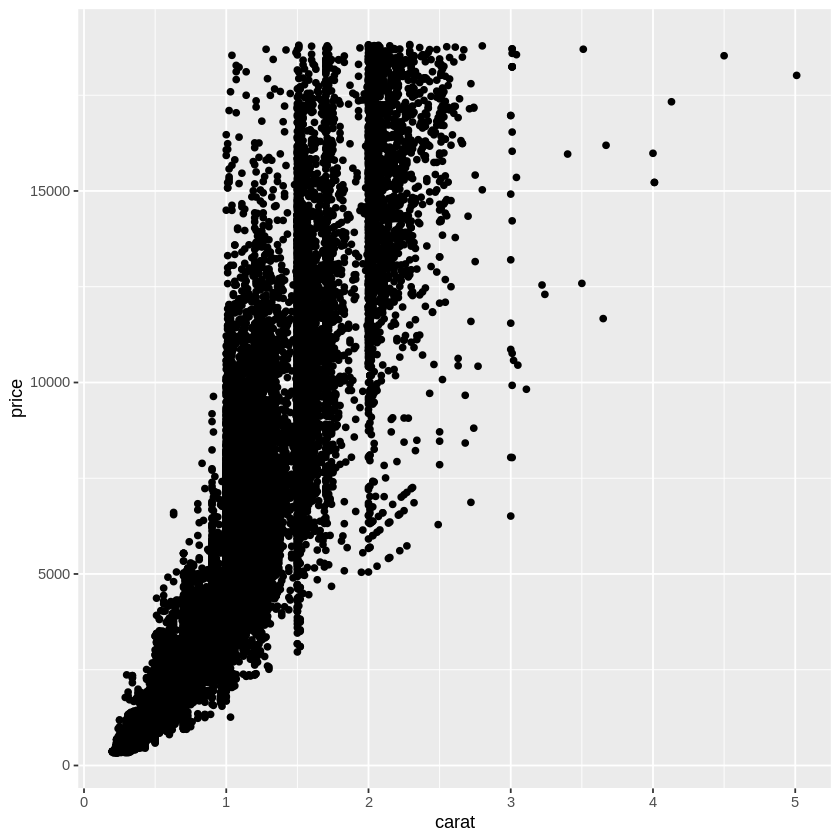

In [44]:
ggplot(data=diamonds, mapping=aes(x=carat, y=price)) + 
    geom_point() # layers added on with a "+" operator

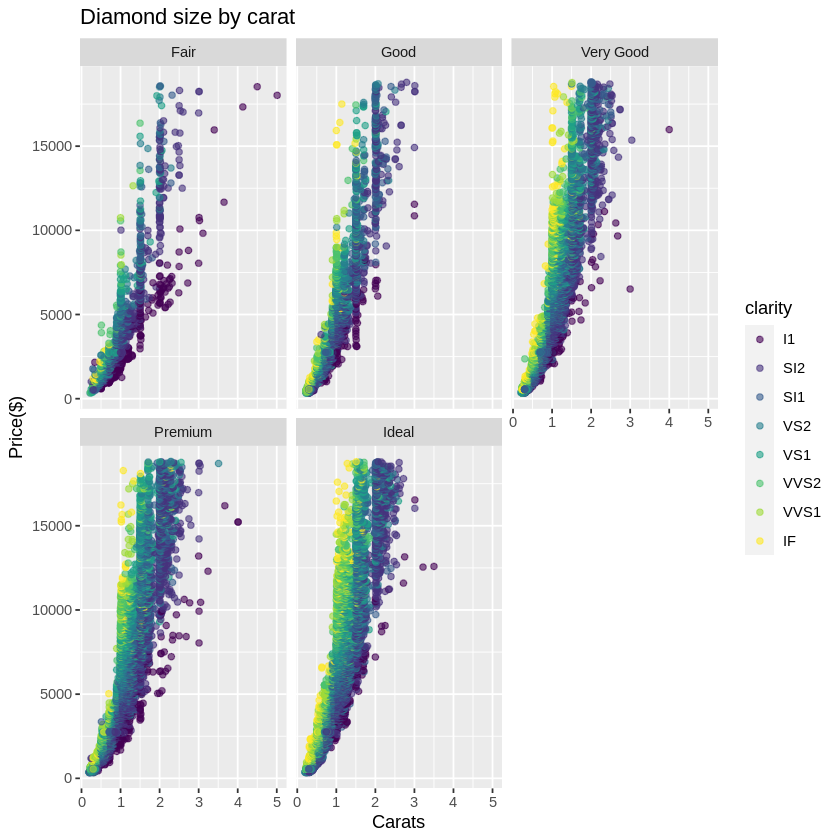

In [53]:
ggplot(data=diamonds, aes(x=carat, y=price, color=clarity)) + 
    geom_point(alpha=0.6) +
    facet_wrap(~cut, ncol=3) +
    labs(x='Carats', y='Price($)') +
    ggtitle('Diamond size by carat')

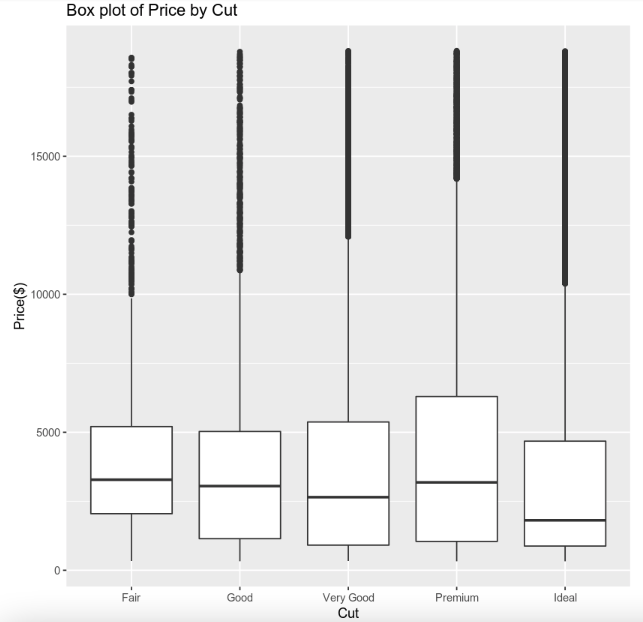

Exercise: Recreate above box-plot (hint you need to use geom_boxplot)

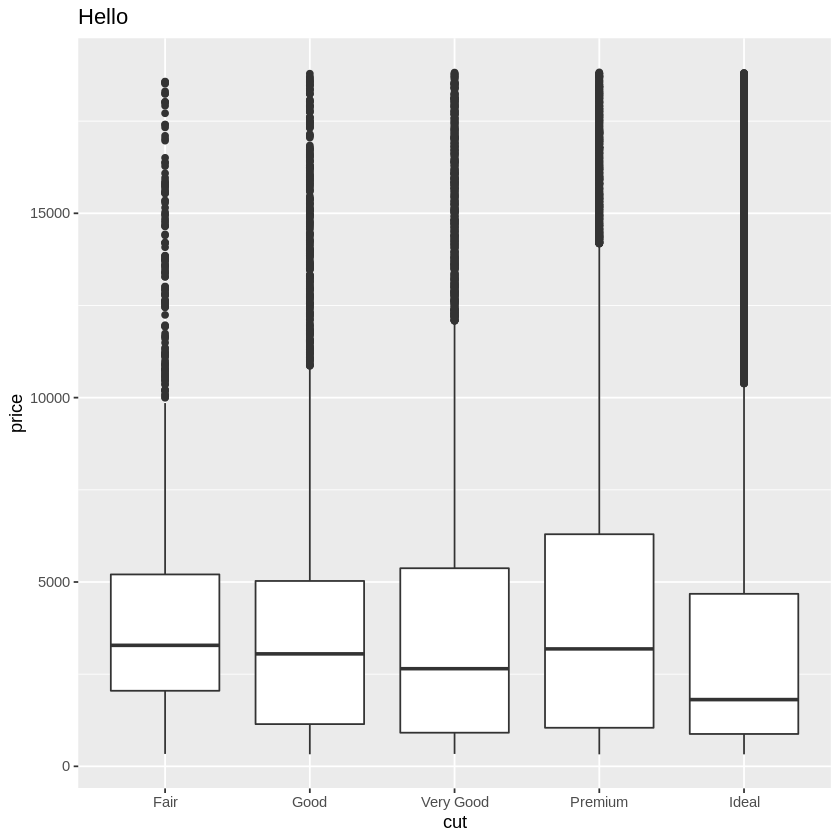

In [56]:
# YOUR CODE HERE

What are those points above the boxes?

What are those straight lines on the boxes?